In [54]:
import pandas as pd 
import json 


In [55]:
import json

metric_dict = {}
with open('mae.json', 'r') as f:
    mae = json.load(f)
    for experiment, d in mae.items():
        for run, maes in d.items():
            metric = sum(maes.values()) / len(maes.values())
            d=  metric_dict.get(f"{experiment}_{run}", {})
            d.update({'mae': metric})
            metric_dict[f"{experiment}_{run}"] = d

with open("mAP.json", 'r') as f:
    mAP = json.load(f)
    for experiment, d in mAP.items():
        for run, mAP in d.items():
            d = metric_dict.get(f"{experiment}_{run}", {})
            d.update({'mAP': mAP})
            metric_dict[f"{experiment}_{run}"] = d

with open("mae_visible_only.json") as f:
    mae_visible_only = json.load(f)
    for experiment, d in mae_visible_only.items():
        for run, maes in d.items():
            metric = sum(maes.values()) / len(maes.values())
            d=  metric_dict.get(f"{experiment}_{run}", {})
            d.update({'mae_visible_only': metric})
            metric_dict[f"{experiment}_{run}"] = d

In [56]:
runs = metric_dict.keys()
metrics = metric_dict.values()
mAEs = [v['mae'] for v in metrics]
mAPs = [v['mAP'] for v in metrics]
mAEs_visible_only = [v['mae_visible_only'] for v in metrics]

df = pd.DataFrame({'run': runs, 'mae': mAEs, 'mAP': mAPs, 'mae_visible_only': mAEs_visible_only})
df

,run,mae,mAP,mae_visible_only
0,real_dsd,19.440649,0.371196,16.129135
1,real_kpam,71.615815,0.195904,56.541755
2,large-run_ControlNetFromDepthRenderer_ccs=1.5,15.372556,0.513565,13.741707
3,model-comparison-1-stage_ControlNetFromDepthRe...,16.240892,0.490230,13.318858
4,model-comparison-1-stage_ControlNetTXTFromDept...,16.935339,0.462420,14.997541
5,model-comparison-1-stage_SD2FromDepthRenderer,16.615662,0.473222,14.585008
6,model-comparison-1-stage_SD2InpaintingRenderer,103.312096,0.184776,92.532054
7,model-comparison-1-stage_SD15RealisticCheckpoi...,17.111327,0.463795,13.578026
8,model-comparison-1-stage_SD15RealisticCheckpoi...,15.350752,0.500843,13.106432
9,model-comparison-1-stage_SDXLControlNetTXTFrom...,17.266032,0.489058,14.362310


In [57]:
# get correlation of mae and mAP
correlation = df["mAP"].corr(df["mae"])
print(correlation)
correlation = df["mAP"].corr(df["mae_visible_only"])
print(correlation)

-0.9298915456641268
-0.9125310572029124


3.4382836805416765


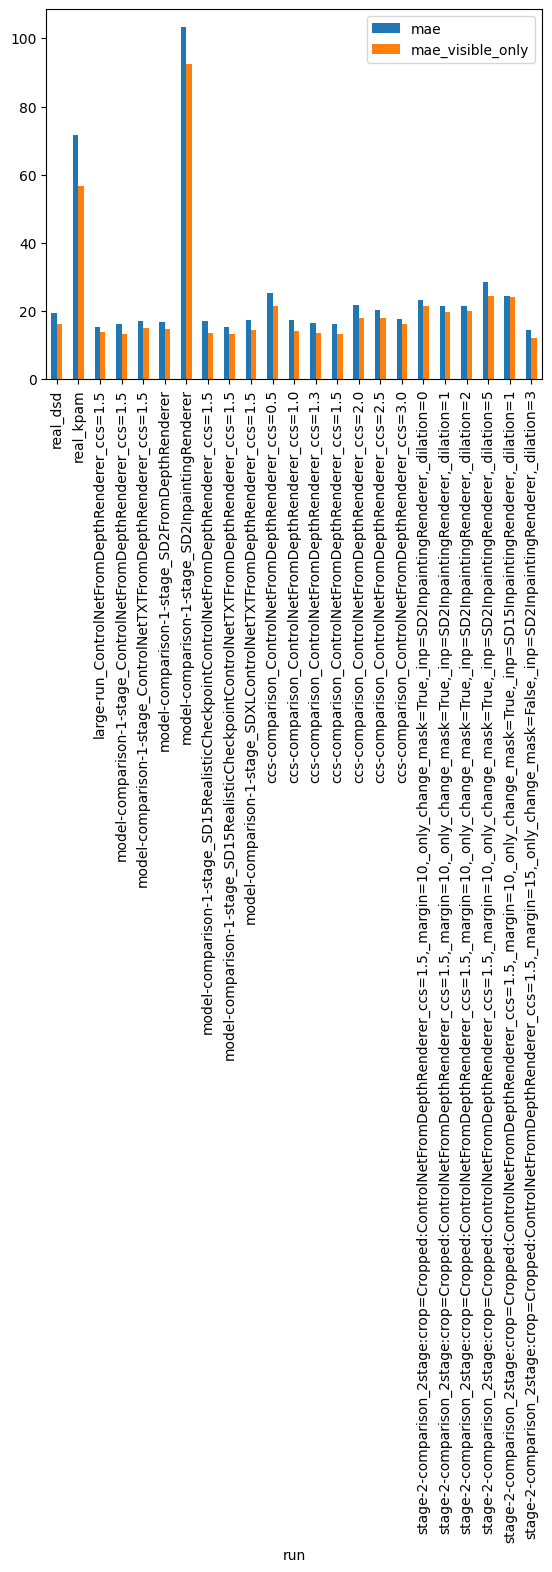

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a bar chart of mae and visible only mae on the y axis and the run on the x axis
df.plot(x="run", y=["mae", "mae_visible_only"], kind="bar")
# print the average difference between the two
print(df["mae"].mean() - df["mae_visible_only"].mean())

Text(0.5, 1.0, 'mAP vs MAE for all experiments')

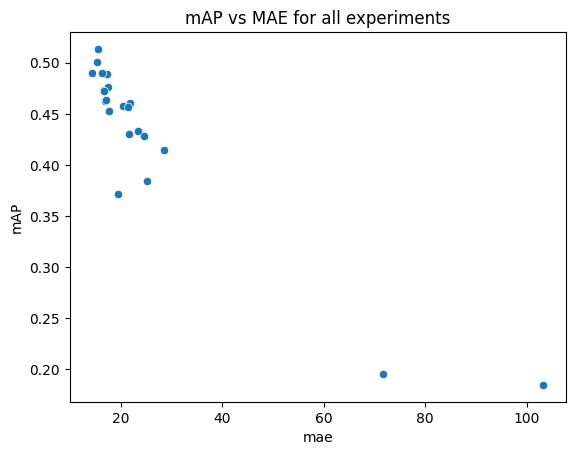

In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='mae', y='mAP')
plt.title("mAP vs MAE for all experiments")